#  Exoplanets

* **Author:** Chinmay Ambasht

* **Date:** 9. 14. 23

* **Time spent on this assignment:**

In [55]:
import numpy as np
from exo_helper import get_planet_vxvy_barycentric
import matplotlib.pyplot as plt
import math
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','math','get_planet_vxvy_barycentric']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return 

In [56]:
SolarSystemParameters=dict()
SolarSystemParameters["EarthOrbitRadius"] = 149.6e9 # meters
SolarSystemParameters["EarthMass"]       = 5.972e24 # kg
SolarSystemParameters["MoonOrbitRadius"] = 363228.9e3
SolarSystemParameters["MoonMass"]        = 7.34e22 # kg

SolarSystemParameters["JupiterMass"] = 1898600.00e21 #kg
SolarSystemParameters["VenusMass"]   = 4868.5e21     #kg

SolarSystemParameters["SunRadius"] = 695.51e3 #meters
SolarSystemParameters["SunMass"]   = 1.989e30 # kg
SolarSystemParameters["G"]         = 6.67408e-11

## Exercise 1: Signal Processing and Fourier Transforms

* **List of collaborators:**

* **References you used in developing your code:**

### 0. Background

**A brief history of exoplanet searches**

Since the first confirmed detection in 1992 by Wolszczan & Frail [<sup>1</sup>](#fn1) of a planet orbiting a distant star, the discovery of thousands of other exoplanets has become one of the greatest achievements of modern astronomy. (The detection of gravitational waves is another!)

Thanks to advances in instrumentation and methods of data analysis, over 3,000 exoplanets have been identified to date in more than 2,000 star systems[<sup>2</sup>](#fn2).  The features of these planetary systems—the eccentricity and inclination of planetary orbits, as well as the number of planets in a system—have varied more from system to system than had been expected.

The quest for exoplanetary systems is driven in part by curiosity about our own solar system. In the 17th century Sir Isaac Newton realized that the solar system is more organized than is required by the laws of motion[<sup>3</sup>](#fn3).  But for centuries we did not know how similar other planetary systems might be to our own, or even if it was common for other stars to have planets. Is the organization of our solar system unique? Is the Earth unusual in size, and in orbiting the sun in a habitable zone? How were the solar system and the other exoplanet systems formed? With a broad survey of exoplanets we can begin addressing some of these questions.

The solar system comprises eight planets (nine if you cannot live without Pluto!), moving in nearly circular orbits around the sun with an average eccentricity of 0.06. Their orbital planes are nearly parallel to a plane that is perpendicular to the sun’s rotation axis. Most of the solar system’s angular momentum resides in the planets, with the sun’s rotational angular momentum contributing only about ~0.5% of the total. Inspired by these facts, the French scholar Pierre- Simon Laplace (1749 – 1827) devoted much of his life to constructing a theory of the motions of the planets, arguing that the stability of the solar system would not require “periodic divine intervention.” [<sup>4</sup>](#fn4)

In 1995 Mayor & Queloz[<sup>5</sup>](#fn5) discovered the first exoplanet orbiting a sun-like star (a star with mass close to $M_\odot$, the solar mass). It is 51 Pegasi, 15.6 parsecs (50.9 light years) from us in the constellation Pegasus. Its planetary companion is 51 Pegasi b, now called “Dimidium,” a gas giant that is about half as massive as Jupiter. It was detected indirectly, through observation of a periodic variation in the Doppler shift of light from 51 Pegasi as the star and its planet orbited the two-body center of mass. This is one of the most effective techniques in the hunt for new planets.

The following figure shows the number of planets discovered each year between 1995 and January 2017.[<sup>6</sup>](#fn6)

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets1.png" width=800 alt="confirmedExoplanets"></img><br></div>

**Detection techniques**

Here are some of the techniques used in searches for exoplanets.

1. Doppler spectroscopy (gives planet mass). Searchers use the Doppler effect to measure the star's velocity variation as the star and planet orbit their center of mass. The period of the spectral variation yields the planet’s mass from Kepler's 3rd law. Depending on the mass of the star, Earth-sized exoplanets can be detected out to 50 to 1,000 parsecs (1 parsec = $1.0857 \times 10^{16}$ m, about 3.26 lightyears), while Jupiter-sized planets can be found out to 1,000 parsecs.[<sup>7</sup>](#fn7) [<sup>8</sup>](#fn8) 


2. Transient photometry (gives planet radius). When a planet crosses in front of its host star it will block a small amount of light that would otherwise reach the earth, causing a sometimes-detectable reduction in the star’s apparent brightness. The fractional change in brightness should be proportional to the ratio of the cross sectional areas of the planet and star. If we are able to estimate the size of the star, we can determine the planet’s radius.[<sup>9</sup>](#fn9)  A disadvantage of this technique is that it requires the earth-bound observer to reside close to the plane that contains the exoplanet’s orbit. This is not the case for most exoplanet systems! For example, the probability that a randomly placed distant observer could detect the earth’s transit across the disk of the sun would be somewhat less than a half percent.


3. Pulsar timing variations (give planet mass). A pulsar is a rapidly spinning neutron star or white dwarf whose strong magnetic fields ($\sim 10^{10}$ T) are not aligned with the object’s rotation axis. The rapid rotation of the star induces (changing) electric fields that generate a high-energy beam of protons and electrons. Astronomers can detect the radiofrequency signatures of the beam as it sweeps across earth’s line-of-sight to the pulsar. Because pulsar rotation rates are very regular—some are more precise than atomic clocks—the detected frequency on earth is very sensitive to anomalies, such as a Doppler shift caused by the influence of a companion planet.

4. Direct imaging. Direct imaging of an exoplanet is difficult, but not impossible. In most cases the host star will outshine the intrinsic thermal radiation from the planet, but when the planet is big enough, far enough from its parent star, or hot enough to emit stronger radiation, it can actually be seen in images. For direct imaging, astronomers use “coronagraphs,” designed to block most light from the host star imaged by a camera, leaving the planet visible. An example is the HR 8799 system in the constellation Pegasus. Three of its planets, each with a mass several times grater than Jupiter’s, were first seen in 2008. A fourth was observed in 2009.[<sup>10</sup>](#fn10) It is also possible that “orphan” planets, which are not bound to a stars, might be detected by direct imaging.

For more information about exoplanet detection see the various Wikipedia pages and review papers on the subject.[<sup>11</sup>](#fn11)

**Stellar spectra and Doppler shifts**

When we look at a star, where are the “received” photons actually coming from? Think of a star as a sphere of plasma, comprising a huge number of moving ions and free electrons. In the interior of the star where the photons are produced, the density of charged particles is so high (about $10^{26}$ particles per $cm^3$ in the sun[<sup>12</sup>](#fn12)
) and the environment so hot that propagating photons scatter frequently, typically within a centimeter. The photons that escape from a star without further scattering tend to come from a thin shell called the photosphere at the star’s surface.

The observed features in stellar spectra—the profile of brightness as a function of wavelength, along with emission and absorption lines, arise from the physical processes taking place in the star’s photosphere (and deeper regions), as well as the atmospheres of the star and the earth. Much of the received light is blackbody radiation, the stellar equivalent of the glow from the hot coils of a toaster. But elements near the surface of the sun also emit and absorb light at frequencies corresponding to quantum transitions between energy levels, yielding bright and dark spectral lines. Absorption in the star’s atmosphere, as well as the earth’s (for ground-based observations), further shapes spectral observations. The following figure shows the hydrogen emission spectrum; the figure after that shows the solar spectrum arriving at the surface of the earth.[<sup>13</sup>](#fn13)

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets2.png" width=800 alt="confirmedExoplanets"></img><br></div>

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets3.png" width=600 alt="confirmedExoplanets"></img><br></div>

If a star is moving towards or away from the observer, the wavelengths of observed spectral features will be Doppler shifted, allowing a determination of $v_\textrm{rad}$ , the radial (towards/away) component of the star’s velocity. The exact expression is

$$ \lambda_\textrm{observed} = \lambda_\textrm{source} \sqrt{\frac{c+v_\textrm{rad} }{ c-v_\textrm{rm}}}\approx \lambda_\textrm{source} \left( 1+ \frac{v_\textrm{rad}}{c}\right)$$

$$$$

so that 

$$ \frac{\lambda_\textrm{observed}-\lambda_\textrm{source} }{ \lambda_\textrm{source}} = \frac{v_\textrm{rad}}{c} $$

Positive $v_\textrm{rad}$ corresponds to motion away from the observer, which causes a “red-shift” to longer wavelengths. For example, a hydrogen line with wavelength 656.2724827 nm will shift by 0.01 nm for a radial velocity of $v_\textrm{rad} = 4.568 km/s$.[<sup>14</sup>](#fn14) (The Doppler shift for motion perpendicular to the observer’s line of sight is proportional to $v^2/c^2$, and is usually unobservable.)

The plot below is a schematic representation of the spectral shift in response to radial motion.

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets4.png" width=400 alt="NormalizedPower"></img><br></div>

The star and planets in an exoplanetary system orbit the system’s barycenter (center of mass). As a result, the star’s radial velocity with respect to the earth will change with time, causing a time-dependent Doppler shift.

The following figure shows the position of the solar system’s barycenter relative to the center of the sun over the course of a century. The motion is complex since the offset of the barycenter is determined primarily by the trajectories of several massive planets with different orbital periods. Even so, a distant observer will be able to pick out contributions to the sun’s Doppler shift with period 11.86 years (from Jupiter) and another with period 29.46 years (from Saturn).

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets5.png" width=400 alt="confirmedExoplanets"></img><br></div>

Exoplanet hunters look for time-varying Doppler shifts in stellar spectra. More colorfully [<sup>15</sup>](#fn15):

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets6.png" width=400 alt="exoplanetsComic"></img><br></div>

### a. Variation in the host star's radial velocity

Arkushanangarushashutu[<sup>16</sup>](#fn16) (more commonly known as Asellus Australis, or $\delta$ Cancri) is an orange giant in the constellation Cancer that lies close to the ecliptic, the plane defined by the earth’s orbit. An alien planet hunter in the Arkushanangarushashutu system would see our solar system almost edge-on, perhaps even observing the transit of planets across the disk of the sun.

Here is a simplified diagram of the geometry, showing the sun and one planet. If we omit the remaining planets, the sun and the planet will move in circular orbits around their center of mass so that the Doppler shift seen at $\delta$ Cancri will vary sinusoidally with time.

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets7.png" width=800 alt="confirmedExoplanets"></img><br></div>

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets8.png" width=800 alt="confirmedExoplanets"></img><br></div>

From the observer's perspective, the measured velocity variation is a projected quantity, since the Doppler shift is only sensitive to the component of velocity along the radial (line-of- sight) direction. The radial velocity is the inner product of the two vectors: (1) the unit vector along the observer’s line-of-sight and (2) the star’s velocity vector.

**A lightning-fast tour of our special function**  
To get our hands a little dirty and simulate the observed solar system radial velocities, we've gone and figured out the math and implemented it in a handy function!
`get_planet_vxvy_barycentric(mass,t)` returns the planets' x, y velocities in a barycentric (CM) coordinate system. Given the default masses below, the first item is the sun, the second Jupiter. If there's a third mass ("Venus" let's say), that'll be the third entry.

```python
# define the masses, in kg. The first is the sun, the second Jupiter, 
# the third Venus.  
# See https://en.wikipedia.org/wiki/List_of_Solar_System_objects_by_size
mass = np.array([SolarSystemParameters["SunMass"],SolarSystemParameters["JupiterMass"],0.0])
# get vx, vy for the sun + jupiter + venus.
vxList, vyList = get_planet_vxvy_barycentric(mass,t)
```

🦉Please do the following. Generate a plot of the sun’s $x$ component of velocity over a 25 year period, at 15 day intervals for just one planet (Jupiter). Please use 365.25 days as the length of one year.

How much variation in wavelength would this induce in a 500 nm spectral line?

Here is what I got:

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets9.png" width=400 alt="confirmedExoplanets"></img><br></div>

If we were to include a second planet, for example, one moving in Venus’ orbit, but with ten times as much mass, we’ll see wiggles at the Venusian orbital period superimposed on the larger Jovian-induced variation. Please set the Venusian mass to ten times its actual value of 4868.5e21, rather than zero.  
🦉Generate another plot of the sun’s velocity. It should look like this:

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets10.png" width=400 alt="confirmedExoplanets"></img><br></div>

You should define the masses, in kg. The first is the sun, the second Jupiter, the third Venus. See https://en.wikipedia.org/wiki/List_of_Solar_System_objects_by_size

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [57]:
SolarSystemParameters=dict()
SolarSystemParameters["EarthOrbitRadius"] = 149.6e9 # meters
SolarSystemParameters["EarthMass"]       = 5.972e24 # kg
SolarSystemParameters["MoonOrbitRadius"] = 363228.9e3
SolarSystemParameters["MoonMass"]        = 7.34e22 # kg

SolarSystemParameters["JupiterMass"] = 1898600.00e21 #kg
SolarSystemParameters["VenusMass"]   = 4868.5e21     #kg

SolarSystemParameters["SunRadius"] = 695.51e3 #meters
SolarSystemParameters["SunMass"]   = 1.989e30 # kg
SolarSystemParameters["G"]         = 6.67408e-11

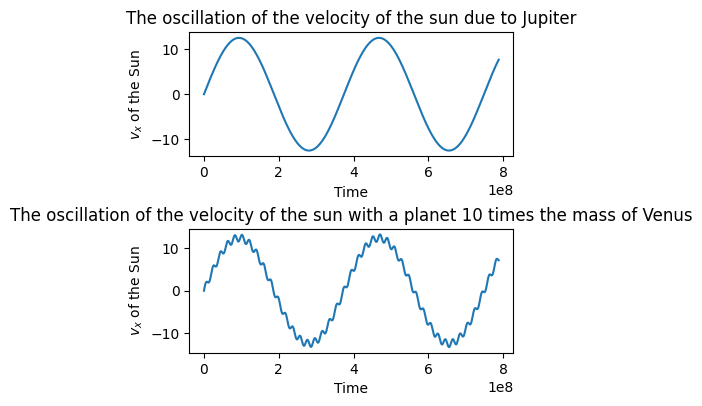

In [58]:
### ANSWER HERE
params = dict()
params['mass'] = np.array([SolarSystemParameters['SunMass'], SolarSystemParameters['JupiterMass'], 0.0])
params['time'] = 25 * 365.25 * 3600 * 24
params['dt'] = 15 *3600 * 24
def get_Velocity_Sun(params):
    vx_sun = []
    for t in np.arange(0,params['time'],params['dt']):
        vx_sun.append(get_planet_vxvy_barycentric(params['mass'],t)[0][0])
    return vx_sun

fig,ax = plt.subplots(2,1,figsize= (4,4))
# Plotting code for Sun + Jupiter
vx_sun = get_Velocity_Sun(params)
ax[0].plot(np.arange(0,params['time'],params['dt']),vx_sun)
ax[0].set_ylabel('$v_x$ of the Sun')
ax[0].set_xlabel('Time')
ax[0].set_title('The oscillation of the velocity of the sun due to Jupiter')


# Plotting code for Sun + Jupiter + 10*Venus 
params['mass'] = np.array([SolarSystemParameters['SunMass'], SolarSystemParameters['JupiterMass'],
                            10*SolarSystemParameters['VenusMass']])
vx_sun = get_Velocity_Sun(params)
ax[1].plot(np.arange(0,params['time'],params['dt']),vx_sun)
ax[1].set_ylabel('$v_x$ of the Sun')
ax[1].set_xlabel('Time')
ax[1].set_title('The oscillation of the velocity of the sun with a planet 10 times the mass of Venus')
fig.tight_layout(pad = 0.5)
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Note that this tuning of planet masses will not appreciably change the planet's orbital period, since that is determined primarily by the mass of the host star.

### b. Background - Inclination and (Discrete) Fourier Transforms

**When the orbital plane is inclined**

In the previous case, the observer is in the orbital plane of the sun-earth system, which maximizes the amplitude of the Doppler shift modulation. But the orientation of orbital planes of exoplanetary systems is going to be random, so let’s explore that now. Let's move the observer slightly above the plane, and see what the measured velocity component looks like. See the diagram below:

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets11.png" width=400 alt="confirmedExoplanets"></img><br></div>

Here we define the inclination angle $i$ as illustrated in the above diagram. When $i = 90^o$ the observer is in the orbital plane of the exoplanet and the radial velocity of the star will be maximal. When $i = 0$ the radial velocity is zero. More generally, the observed radial velocity will the product of the star’s velocity and $\sin(i)$. Note that the amplitude, but not the period of the Doppler modulation depends on $i$.

**Mass estimate for the planet**

Imagine that we have a binary system of one planet traveling around one star, with both bodies orbiting in circular paths around their center of mass. The periods of their orbits will be identical, of course. If the two objects are at distances astar and aplanet from their barycenter, the separation between the star and the planet will be a = $a_\textrm{star} + a_\textrm{planet}$. Further, the relationship between their masses and orbital radii is $M_\textrm{star}a_\textrm{star} = M_\textrm{planet}a_\textrm{planet}$.

We can derive Kepler’s third law (that the square of the orbital period is proportional to the cube of the orbit’s semi-major axis) if we approximate the planet mass as negligible compared to the star’s, and the radius of the star’s orbit as negligible compared to the planet’s. Gravity provides the centripetal force that causes the planet to move in a circle with constant speed $v_\textrm{planet}$ and orbital period $P$:

$$\frac{Gm_\textrm{star}m_\textrm{planet}}{\left(a_\textrm{planet}+a_\textrm{start} \right)^2} = \frac{m_\textrm{planet}v^2_\textrm{planet}}{a_\textrm{planet} }$$ 

$$ \frac{Gm_\textrm{star}}{a^2_\textrm{planet}} \approx \frac{v^2_\textrm{planet} }{a_\textrm{planet} } = \frac{1}{a_\textrm{planet} } \left( \frac{2\pi a_\textrm{planet}}{P} \right)^2$$

$$ Gm_\textrm{start} \approx \left(\frac{2\pi}{P} \right)^2 a^3_\textrm{planet}$$

That’s Kepler’s third law: the ratio of the cube of the radius and the square of the orbital period is constant.

We are only able to measure two quantities: the period P and the radial velocity $v_r = v\sin(i)$. Do some more algebra:

$$
\begin{align}
GM_{\text{star}} &\approx \left(\frac{2\pi a_{\text{planet}}}{P}\right)^2 a_{\text{planet}}\\
&= \left(\frac{2\pi a_{\text{star}}}{P}\frac{m_{\text{star}}}{m_{\text{planet}}}\right)^2 a_{\text{star}} \frac{m_{\text{star}}}{m_{\text{planet}}}\\
&= \left(v_{\text{star}}\frac{m_{\text{star}}}{m_{\text{planet}}}\right)^2\frac{P}{2\pi}\frac{2\pi a_{\text{star}}}{P}\frac{m_{\text{star}}}{m_{\text{planet}}}\\
&=\left(v_{\text{star}}\frac{m_{\text{star}}}{m_{\text{planet}}}\right)^2\frac{P}{2\pi} v_{\text{star}}\frac{m_{\text{star}}}{m_{\text{planet}}} = \frac{P}{2\pi}\left(v_{\text{star}}\frac{m_{\text{star}}}{m_{\text{planet}}}\right)^3
\end{align}
$$

Do some more algebra:

$$
\begin{align}
G m_{\text{star}} &\approx \frac{P}{2\pi}\left( v_{\text{star}} \frac{m_{\text{star}}}{m_{\text{planet}}}\right)^3\\
G\frac{m^3_{\text{planet}}}{m^2_{\text{star}}} &= \frac{P}{2\pi}v^3_{\text{star}}\\
\frac{m^3_{\text{planet}}}{m^2_{\text{star}}} &= \frac{P\left(v_{\text{star}}\sin i\right)^3}{2\pi G \sin^3 i}
\end{align}
$$
&nbsp;    
&nbsp;    
$$
\begin{align}
m^3_{\text{planet}}\sin^3 i &= m^2_{\text{star}} \frac{P}{2\pi G}\left(v_{\text{star}}\sin i\right)^3\\
m_{\text{planet}}\sin i &= \left(\frac{m^2_{\text{star}} P}{2\pi G}\right)^{1/3} v_{\text{star}}\sin i\\
&=\left(\frac{m^2_{\text{star}} P}{2\pi G}\right)^{1/3} v_r\\
&\equiv m_{\text{projected}}.
\end{align}
$$

To summarize,

$$ \boxed{m_\textrm{projected} = \left( \frac{m^2_\textrm{star} P }{ 2\pi G } \right)^{1/3} v_r }$$

Since we measure the period and the radial velocity, we can (if we have a good estimate of the star’s mass) determine a the “projected mass,” which is a lower limit on the planet’s mass since $m_\textrm{planet} \sin i \leq m_\textrm{planet}$ . Since astronomers are generally able to make a reasonably good estimate of a star’s mass from its observable properties, we are able to evaluate the right side of the equation to solve for the planet’s projected mass.

**Extracting the amplitude and period from our data**

We would like to extract the planet’s projected mass from the radial velocity data. Recall that

$$m_\textrm{projected} = \left( \frac{m^2_\textrm{star}P }{ 2\pi G} \right)^{1/3} v_r$$

where $v_r$ is the amplitude of the radial velocity modulating the Doppler shift in the stellar spectrum. There are many techniques that we might choose to fit for the periodic signal in the radial velocity data!

*Fourier transform*

One of the most powerful is to generate a Fourier transform of the time series data to plot the amplitude of the radial velocity as a function of frequency, rather than as a function of time. We should see strong peaks at the frequencies of any planetary orbits.

Here’s an example. Let’s take the Fourier transform of the function of time f(t) to produce its Fourier transform $\hat{f}(\omega)$. Imagine that $f(t)=a$ where $|t|<\tau$ and $f(t)=0$ when $|t|>\tau$.

The definition of the Fourier transform of $f$ is this:

$$\hat{f}(\omega) = \frac{1}{\sqrt{2\pi} } \int_{-\infty}^\infty f(t) e^{-i\omega t} dt$$

We expect that there will be significant contributions to the frequency distribution for frequencies with periods that are not long compared to $\tau$. It is easy to do the integral, so let’s see if this is borne out.

$$
\begin{align}
\hat{f}(\omega) &= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty} f(t) e^{-i\omega t} dt\\
&= \frac{1}{\sqrt{2\pi}}\int_{-\tau}^{+\tau} a e^{-i\omega t}dt\\
&= \frac{a}{-i\omega\sqrt{2 \pi}} \int_{-\tau}^{+\tau} e^{-i\omega t}d(-i\omega t)\\
&= \frac{a}{-i\omega\sqrt{2 \pi}} \left. e^{-i\omega t} \right|_{-\tau}^{+\tau}\\
&= \frac{a}{i\omega\sqrt{2 \pi}}\left[ e^{i\omega t} - e^{-i\omega t}\right]\\
&= \sqrt{\frac{2}{\pi}} \frac{a\sin\tau\omega}{\omega}.
\end{align}
$$

For low frequencies, when $\omega$ is small compared to $1/\tau$, the function is nearly constant. For high frequencies it falls in amplitude like $1/\omega$, but is also modulated by the sine term. Here’s a graph:

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets12.png" width=350 alt="confirmedExoplanets"></img><br></div>

If instead we were to calculate the Fourier transform of a periodic function of time we would see a large peak at the frequency of the function.

A very common application of Fourier transforms is to calculate the amplitude vs. frequency for a signal whose transport of energy is proportional to the square of the amplitude. In this circumstance we will have the power per unit frequency going like

$$|\hat{f}(\omega)|^2 = \hat{f}^*(\omega)\hat{f}(\omega) = \left( Re \hat{f}(\omega) \right)^2 + \left(Im \hat{f}(\omega)\right)^2$$

(An asterisk indicates taking the complex conjugate.)

**Discrete Fourier Transform (DFT)**

The Fourier transform discussed above can only be applied to functions that are well defined over a continuous range of times. But experimental data is often only available at discrete times, as is true for the Epsilon Reticuli data. Ground-based optical telescopes can only operate at night, in good weather!

There are a number of techniques for extracting a frequency spectrum from a discrete data set. Some are appropriate for measurements separated by regular intervals, and some work for data sets in which measurements occur irregularly. The algorithms will tend to resemble the Fourier transform discussed above, but there will be subtle complications associated with the sampling rate and duration of the overall program of measurements.

Let’s ignore these fine points for now and consider how to adapt the Fourier transform algorithm to sets of regularly spaced measurements. We’ll start with the solar velocity distributions you generated for **1a**.

If we had somehow obtained a continuous function $v(t)$ for the sun’s velocity we would generate the Fourier transform this way:

$$ \hat{v}(\omega) = \frac{1}{\sqrt{2\pi} } \int_{-\infty}^{\infty} v(t) e^{-i\omega t} dt.$$

If instead we had made discrete measurements at times $t_0,t_1,t_2,...$ each separated by $\Delta t$ from the adjacent measurements we could approximate the integral as 

$$\hat{v}(\omega) = \frac{1}{\sqrt{2\pi} } \int_{-\infty}^{\infty} v(t) e^{-i\omega t} dt \approx \frac{1}{\sqrt{2\pi} } \sum_k \left[ v(t_k) e^{-i\omega t_k} \Delta t \right] $$

Let’s see how well this works on the Jupiter/Venus data you generated above.

### c. Implementing a DFT

🦉Modify your code from **1a** so that it generates solar radial velocity data for 100 years, at 1 day intervals. (A year is 365.25 days long.) Make sure that you’ve made Venus ten times more massive than its true value so that your calculations use 4868.5e22 kg.

Once that is working, you’ll use the time and velocity arrays when you add code that will calculate the discrete Fourier transform as described above for 500 different frequencies ω. Here are the parameters you should use:

```python
# frequency upper, lowe limits in 1/year:
f_max = 2.5
f_min = 1 / 100.
omega_max = 2 * np.pi * f_max
omega_min = 2 * np.pi * f_min
# number of omega values to run through
number_omegas=500
# now the values we will loop over..
omega_array=np.linspace(omega_min,omega_max,number_omegas)
```

It is perfectly fine to use years as your unit of time, as long as ω has units of inverse years. Let’s say that your time and velocity arrays are named `tarray` (values are in years) and `varray` (values are in m/s). For each $\omega$ value you can do the sum like this (take note of the use of 1j as the square root of -1):

```python
FT_integral = 0 + 0j
for i in range(0, len(tarray)):
    FT_integral += varray[i]*np.exp(-1j * omega * tarray[i]) 
FT_integral = FT_integral / np.sqrt(2 * np.pi)
```
**Note:** List comprehensions can make a large speedup here! This code will be slow, but try and make it as fast as possible if you have time.


🦉Calculate the square of the magnitude of `FT_integral` at each ω value, then graph that as a function of $\omega$.  You may want to use a logarithmic y scale. You should see two clear peaks, corresponding to the orbital frequencies of Jupiter and Venus.

Here are my plots. Note that in the second I am plotting frequency $f$, and not $\omega = 2\pi f$ along the horizontal axis.

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets13.png" width=600 alt="confirmedExoplanets"></img><br></div>

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

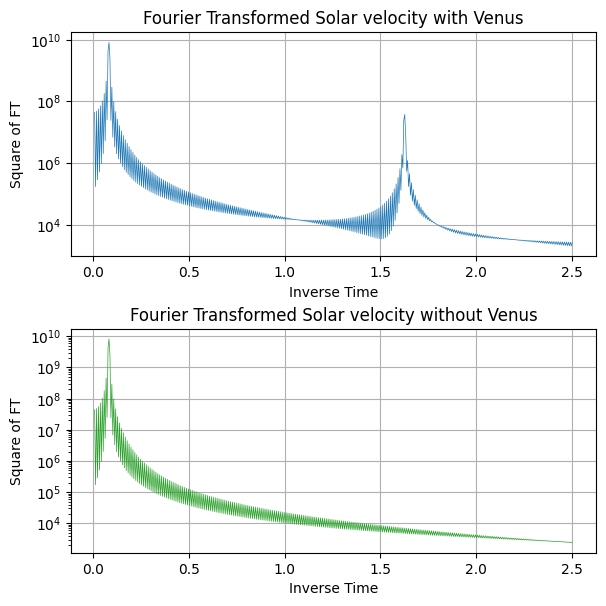

In [59]:
### ANSWER HER
params['time'] = 100 * 365.25 * 24 * 60 * 60#yrs
params['dt'] = 1 * 24* 60 * 60 # 1 day
params['f_max'] = 2.5 #1/yr
params['f_min'] = (1/100) #1/yr
params['omega_n'] = 500
params['mass'] = np.array([SolarSystemParameters['SunMass'], SolarSystemParameters['JupiterMass'],
                            10*SolarSystemParameters['VenusMass']])
params['velx_star'] = get_Velocity_Sun(params)
params['ts'] = np.arange(0,params['time'],params['dt'])
 
def DFT_Calculation(params):
    omega_min = 2*np.pi*params['f_min']
    omega_max = 2*np.pi*params['f_max']
    global omega
    omega = np.linspace(omega_min,omega_max,params['omega_n'])
    ts = params['ts']
    velx_star = params['velx_star']
    FT_integral = 0 + 0j
    for i in range(0, len(ts)):
        FT_integral += velx_star[i]*np.exp(-1j * (omega/(365.25* 24*3600)) * ts[i])
    FT_integral = FT_integral / np.sqrt(2 * np.pi)
    return FT_integral    
    
dftList = DFT_Calculation(params)
fig, ax = plt.subplots(2,1,figsize = (6,6))
ax[0].plot(omega/(2*np.pi), np.abs(dftList)**2, linewidth = 0.5)
ax[0].set_xlabel('Inverse Time')
ax[0].set_ylabel('Square of FT')
ax[0].set_yscale('log')
ax[0].set_title('Fourier Transformed Solar velocity with Venus')
ax[0].grid()

params['mass'] = np.array([SolarSystemParameters['SunMass'], SolarSystemParameters['JupiterMass'],0.0])
params['velx_star'] = get_Velocity_Sun(params)
dftModified = DFT_Calculation(params)
ax[1].plot(omega/(2*np.pi), np.abs(dftModified)**2, color = 'C2',linewidth = 0.5)
ax[1].set_xlabel('Inverse Time')
ax[1].set_ylabel('Square of FT')
ax[1].set_yscale('log')
ax[1].set_title('Fourier Transformed Solar velocity without Venus')
ax[1].grid()
fig.tight_layout(pad = 0.5)

params['mass'] = np.array([SolarSystemParameters['SunMass'], SolarSystemParameters['JupiterMass'],10* SolarSystemParameters['VenusMass']])

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Calculating projected mass

🦉Pick out the frequency that corresponds to the lower frequency peak and convert it to the orbital period. (In my plot the left peak is at .0848497/year, corresponding to 11.7855 years.) By combining that with the amplitude of the solar velocity, the known mass of the sun ($1.989 \times 10^{30}$ kg), and other constants, use the formula for projected mass to estimate (a lower limit on) Jupiter’s mass:

$$m_\textrm{projected} = \left( \frac{m^2_\textrm{star}P}{ 2\pi G }  \right)^{1/3} v_r$$

How well did you do? Compare your value to the actual Jupiter mass of $1.898 \times 10^{27}$ kg.  My code yields $2.0220276 × 10^{27}$ kg.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [60]:
### ANSWER HERE
dfList = DFT_Calculation(params)
dftList_mod = np.abs(dftList)**2
# Find the frequency to which Jupiter corresponds
f_1 = np.argmax(dftList_mod)

# Find the projected mass
f_jove = omega[f_1]/(2*np.pi)
P_jove = 1/f_jove
m_projected = ((SolarSystemParameters['SunMass']**2*P_jove*(365.25*24*3600))/(2*np.pi*SolarSystemParameters['G']))**(1/3)*(np.max(params['velx_star']))

print(np.max(params['velx_star']))
print("The frequency corresponding to Jove:",f_jove)
print('Time Period of Jupiter:',P_jove)
print('Projected mass of Jupiter:',m_projected)

12.457964974895138
The frequency corresponding to Jove: 0.08484969939879759
Time Period of Jupiter: 11.785545583372697
Projected mass of Jupiter: 1.8930601865113773e+27


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

**Q:** How well did you do?

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

A:

In [61]:
error = np.abs(m_projected - SolarSystemParameters['JupiterMass'])/SolarSystemParameters['JupiterMass'] 
print("The projected mass of Jupiter:",m_projected,'kg')
print("The actual mass of Jupiter:",SolarSystemParameters['JupiterMass'],'kg')
print("The percentage error in Jupiter's mass is given by:", error*100)

The projected mass of Jupiter: 1.8930601865113773e+27 kg
The actual mass of Jupiter: 1.8986e+27 kg
The percentage error in Jupiter's mass is given by: 0.29178412981263285


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 2 - Epsilon Reticuli Data

* **List of collaborators:** James DiCarlo

* **References you used in developing your code:**

### a. Obtain the Data

Armed with an understanding of our model for radial velocity measurements, let’s take a look at real data from NASA.

Epsilon Reticuli is a double star 59 light years away in the constellation Reticulum.[<sup>17</sup>](#fn17) The larger of the two stars is an orange sub-giant near the end of its life (it is on the way to becoming a red giant). Its smaller companion is a white dwarf, at a distance of 240 AU from the primary. (An AU is the radius of the earth’s orbit). Based on the spectral type (color and brightness) and our understanding of stellar evolution, astronomers estimate the mass of the primary to be ~1.2 $M_\odot$. NASA refers to the system using its “Henry Draper Catalogue”[<sup>18</sup>](#fn18) listing, HD 27442.

In 2001 Butler et al. reported the discovery of HD 27442 b, an exoplanet orbiting the orange star at a distance of 1.2 AU. (As you might have noticed, astronomers name a star’s planets by following the name of the star with the letter b, c, d, etc. The host star is supposed to be the "a." ) The planet is at least 1.5 times as massive as Jupiter, with an orbital period of 428 days.

🦉Download the file [UID_0019921_RVC_002.tbl.txt](https://courses.physics.illinois.edu/phys298owl/fa2019/code/UID_0019921_RVC_002.tbl.txt) from the code repository. We can do this with a trick:

In [62]:
!wget https://courses.physics.illinois.edu/phys246/fa2020/code/UID_0019921_RVC_002.tbl.txt
#you can also download it manually and upload to the same folder of the Jupyter notebook

'wget' is not recognized as an internal or external command,
operable program or batch file.


The file contains data from a NASA exoplanet archive[<sup>19</sup>](#fn19)  that are fully "reduced," meaning that corrections for the motions of the telescope, earth, sun, and solar system around the galactic center have been removed. Since the file is plain text, you can open it and read it with any editor, including Jupyter's. A header listing information about the measurements comprises the first 22 lines of the file.

The header is followed by tabular data of the measured radial velocity spanning a period of about eight years. The three columns in each line of data hold the Julian date, the radial velocity, and the measurement uncertainty in the velocity. The Julian date is the number of days since noon (universal time) on January 1, 4713 BC. (There is a good converter on the Naval Observatory’s web site: see http://aa.usno.navy.mil/data/docs/JulianDate.php.)

The first line of data is
```
2450831.081551    -33.9     2.1
```
which corresponds to January 17, 1998, 13:57:26.0 UT.

We can use various functions in numpy like loadtxt or genfromtxt to create arrays from tabular data. In this exercise, let's try genfromtxt, which converts rows and columns of elements into strings, then converts each string into numbers.[<sup>20</sup>](#fn20)  Since you’ll want to skip the header, please use the “skip_header” option. Here is how this works:

```python
# import data from file UID_0019921_RVC_002.tbl.txt
data = np.genfromtxt(‘UID_0019921_RVC_002.tbl.txt’, skip_header=22)
```

You can load an array of the zeroth column of data this way:
```python
time_array = data[:,0]
```

🦉Please make a graph of the radial velocity as a function of year, setting the time of the first bin to zero. I suggest you set the plot’s aspect ratio via a set_aspect command so that the sinusoidal variations in velocity are easy to see:
```python
fig = plt.figure()
ax = fig.gca() 
ax.set_aspect(0.0125)
```

Here’s what I get. You can see the periodic nature of the signal.

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets15.png" width=600 alt="confirmedExoplanets"></img><br></div>

You can get data using `data = np.genfromtxt('UID_0019921_RVC_002.tbl.txt', skip_header=22)
`.  

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0.5, 1.0, 'HD 27442 (Epsilon Reticuli)')

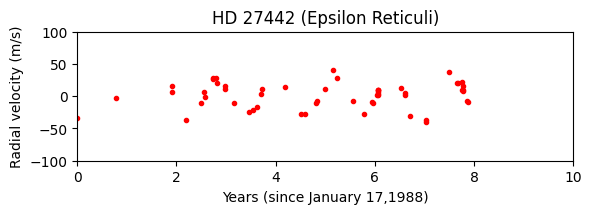

In [63]:
### ANSWER HERE
data = np.genfromtxt('UID_0019921_RVC_002.tbl.txt', skip_header=22)
ts = data[:,0]
radial_velocity = data[:,1]
ts = np.abs(data[:,0]  - data[0,0])/365.25

# Plotting code
fig = plt.figure()
ax = fig.gca()
ax.plot(ts, radial_velocity,'.', color = 'RED')
ax.set_ylim(-100,100)
ax.set_xlim(0,10)
ax.set_yticks(np.arange(-100,100+1,50))
ax.set_aspect(0.013)
ax.set_xlabel('Years (since January 17,1988)')
ax.set_ylabel('Radial velocity (m/s)')
ax.set_title('HD 27442 (Epsilon Reticuli)')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Estimate the mass of HD 27442 b

The stellar mass of HD 27442 is estimated to be 1.23 $M_\odot$  from spectral type identification. Modify your programs from above to feed the HD 27442 data into your discrete Fourier transform algorithm. Make a graph of the square of the amplitude vs. frequency; I suggest you choose the minimum and maximum frequencies (in 1/years) to be 0.2 and 4. Try evaluating the transform for 1,000 frequencies in that range. To determine the amplitude of the velocity curve use the maximum velocity value; we’ll explore this more later.

Use your results for period and velocity amplitude to estimate the (lower limit on the) mass of HD 27442 b. For your information, here are my results and plots.

```
Epsilon Reticuli b period (years; actual value is 1.17) =  1.18113029085
projected Epsilon Reticuli b mass (actual is 2.961e+27) =  3.27159127374e+27
 elapsed running time =  0.6881752014160156  seconds
 ```

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets16.png" width=400 alt="confirmedExoplanets"></img><br></div>

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

The period for Epsilon Reticuli b: 1.1811302908489005 years
The projected mass of HD 27442 b: 3.2735435840271226e+27 kg
1.6856914881306175e-07


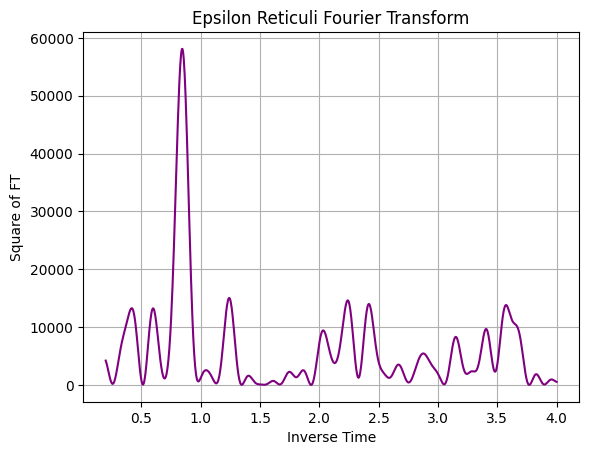

In [73]:
### ANSWER HERE
ts_array = np.abs(data[:,0]  - data[0,0])/365.25
params['time'] = ts_array * (24 * 60 * 60 * 365.25)
params['f_min'] = 0.2 / (24 * 60 * 60 * 365.25)
params['f_max'] = 4 / (24 * 60 * 60 * 365.25)
params['omega_n'] = 1000
params['velx_star'] = radial_velocity

def DFT_Calculation_mod(params):
    omega_min = 2*np.pi*params['f_min']
    omega_max = 2*np.pi*params['f_max']
    global omega
    omega = np.linspace(omega_min,omega_max,params['omega_n'])
    ts = params['time']
    velx_star = params['velx_star']
    dftlist = []
    for w in omega:
        FT_integral = 0 + 0j
        for i in range(len(ts)):
            FT_integral += velx_star[i]*np.exp(-1j * w * ts[i])
        FT_integral = FT_integral / np.sqrt(2 * np.pi)
        dftlist.append(FT_integral)
    return dftlist
dftList = DFT_Calculation_mod(params)
plt.plot(omega/(2*np.pi)*(24 * 60 * 60 * 365.25), np.abs(dftList)**2, linewidth = 1.5, color = 'purple')
plt.xlabel('Inverse Time')
plt.ylabel('Square of FT')
plt.title('Epsilon Reticuli Fourier Transform')
plt.grid()


dftList_mod = np.abs(dftList)**2
# Find the frequency to which Jupiter corresponds
f_1 = np.argmax(dftList_mod)

# Find the projected mass
f_p = omega[f_1]/(2*np.pi)
P_p = 1/f_p
print("The period for Epsilon Reticuli b:",P_p/(365.25*3600*24),"years")
c = ((1.23*SolarSystemParameters['SunMass'])**(2/3)*P_p**(1/3))/(2*np.pi*SolarSystemParameters['G'])**(1/3)
m_projected = c*(np.max(params['velx_star']))
print('The projected mass of HD 27442 b:', m_projected, "kg")

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 3 - Finding the best velocity (extra credit - 10 points)

* **List of collaborators:**

* **References you used in developing your code:**

### 0. Background - $\chi^2$

We define the chi-squared as

$$ \chi^2 = \sum_{i} \frac{\left(N_i - N_{predicted}\right)^2}{\sigma_i^2} $$

$N_i$ is the observed value, $N_{predicted}$ is the predicted value with a particular choice of parameters (for example, a given $v_r$), and $\sigma_i^2$ is the square of the statistical uncertainty (usually taken to be standard deviation or RMS width) associated with the observed value.  

It is a very sensible measure to use in determining how well your parameters match the underlying reality governing the system you are studying: a good parameter set will tend to cause the predicted and observed values to agree to within about one standard deviation. It will be unusual for values to deviate from the expected value by a lot of sigmas, unless your parameters aren’t very good. And it will be unusual for the predicted and observed contents of a large number of bins to agree better than the statistical fluctuations ought to allow. As a result, the value of chi-squared will tend to be about the same as the number of bins in your histogram.   

**What do we mean by "best?"**  

Imagine that we determine some physical parameter— a star's mass, for example—by performing an experiment and analyzing the resulting data. If we were to perform the same experiment many times we’d expect to find slightly different values of the star mass in each of our experiments due to statistical fluctuations in our data. If we plotted the values so obtained we’d probably find that they’d lie on some sort of Gaussian distribution. 
There are subtleties in defining what we mean by "best." Is it best to use an analysis method that minimizes the width of our multiple-experiment distribution of results? Is it best to use a method that makes our single-experiment determination most likely to agree perfectly (though accidentally, due to fluctuations) with the underlying true value of the star mass? Or is some other measure appropriate?  

Perhaps an easy example of the ambiguities in the word "best" are more clear when considering a long-term investment strategy for, say, the college expenses of a family’s children. Naively, one might favor a strategy that, on average, maximizes the ultimate return on investment. But higher-return investments also incur more risk of loss of principal, so a sensible strategy will include consideration of both risk and return, as well as the time at which the funds must be available to pay for college.   

We tend to opt for minimizing the width of a hypothetical multi-experiment distribution. In most cases this is obtained by using a chi-squared test for evaluating how well our parameters are working.

### a. Get $\chi^2$ working

Recall above that we used real exoplanet data and extracted the largest Fourier component $\omega$. In doing so, we essentially set the velocity curve to be $v(t) = v_r \cdot\sin(\omega t+\phi)$  where we chose $\omega$ to be the largest Fourier component, and  $v_r$ to be the maximum of the measured velocities. But what if the telescope wasn’t able to measure the actual maximum velocity? Not only that, how do we know that the points we pick are part of the Fourier component we chose?  

<div><img src="https://clark.physics.illinois.edu/246img/exoplanets17.png" width=600 alt="confirmedExoplanets"></img><br></div>

🦉Please modify your original code to get the error $\sigma_i$ on the velocity measurements, which is the 3rd column of the data file. Then, to compare against, calculate the following values using your guess of $v_r$. Strictly speaking we should search for $\phi$ but let’s just say it is $\phi=5.5$ for now.  
I find:
```
starting time is  Tue Jun 26 12:03:04 2018
chisq =  1075.4055336
ending time is  Tue Jun 26 12:03:04 2018
```

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Chi squared: 1075.405533602734


Text(0.5, 1.0, 'HD 27442 (Epsilon Reticuli)')

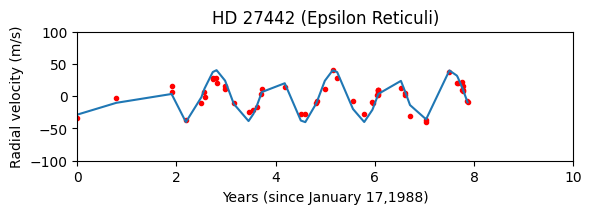

In [103]:
###ANSWER HERE
error = data[:,2]
vr_max = np.max(radial_velocity)
# vr_fit = vr_max*np.sin(omega[f_1]*ts_array + 5.5)

def sine_function(ts_array = ts_array,omega = omega[f_1] * (365.25*24*3600), phi = 5.5, vr_max = vr_max) :
    return vr_max*np.sin(omega*ts_array + phi)
sine = sine_function()

# chi-squared
def chisq(sine = sine, v_r = radial_velocity, error = error):
    c = (sine - radial_velocity)/error
    chi_i = c**2
    chisq = np.sum(chi_i)
    return chisq
print('Chi squared:',chisq())

# plotting code
fig = plt.figure()
ax = fig.gca()
ax.plot(ts, radial_velocity,'.', color = 'RED')
ax.plot(ts, sine)
ax.set_ylim(-100,100)
ax.set_xlim(0,10)
ax.set_yticks(np.arange(-100,100+1,50))
ax.set_aspect(0.013)
ax.set_xlabel('Years (since January 17,1988)')
ax.set_ylabel('Radial velocity (m/s)')
ax.set_title('HD 27442 (Epsilon Reticuli)')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In general, a $\chi^2$ value of $N$, here which is 55, is what would constitute a good fit (why?). Instead we have a value almost 20 times that! We’ll try to get a better answer now.

### b. Find a better fit - Manual

In order to find out what the actual magnitude is, we’ll look at a best fit to determine the best $v_r$. First, determine a range of parameters $v_r$ and $\phi$ to look through. First try a range of $\pm5$ from your original guess at $v_r$ with 500 different velocities and a grid of 0 to 2π of length 200 for $\phi$. 
After you find the best $v_r$ and $\phi$ for the best $\chi^2$, calculate the new projected mass. I find that a smaller $v_r$ fits the data better(!)

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

924.0340038312306
35.89999999999997


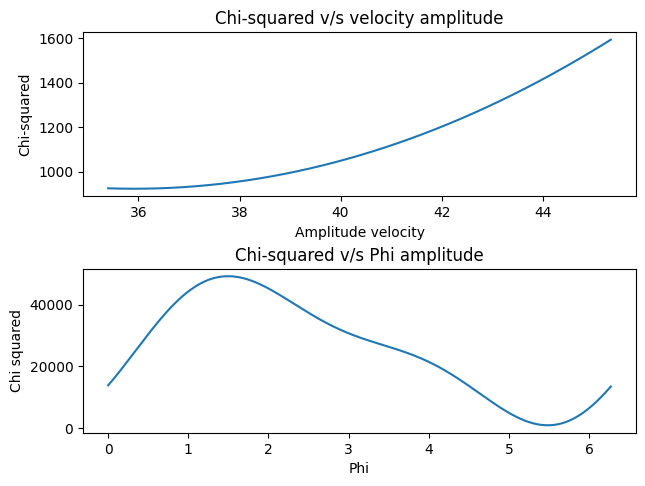

In [123]:
#### ANSWER HERE
v_array = np.arange(vr_max - 5, vr_max + 5,0.05)
phi_array = np.arange(0,2*np.pi,2*np.pi/500)
chi = []
for v in v_array:
    sine_v = sine_function(vr_max=v)
    chi.append(chisq(sine_v))
chimin = np.min(chi)
print(chimin)
for v in v_array:
    sine_v = sine_function(vr_max=v)
    if(chisq(sine_v) == chimin):
        v_ac = v
print(v_ac)
chi_phi = []
for phi in phi_array:
    sine_phi = sine_function(vr_max = v_ac, phi = phi)
    chi_phi.append(chisq(sine_phi))

fig,ax = plt.subplots(2,1)
ax[0].plot(v_array, chi)
ax[0].set_xlabel('Amplitude velocity')
ax[0].set_ylabel('Chi-squared')
ax[0].set_title("Chi-squared v/s velocity amplitude")
ax[1].plot(phi_array,chi_phi)
ax[1].set_xlabel('Phi')
ax[1].set_ylabel('Chi squared')
ax[1].set_title("Chi-squared v/s Phi amplitude")
fig.tight_layout(pad = 0.5)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Find a better fit - `scipy`

While searching through a range is (relatively) easy to code, there are algorithms to smartly search for the best answer. Rather than spend a lot of time (and maybe pain) writing our own, `scipy` comes with a prewritten one. To use it, first at the top of your file add 
```python
from scipy import optimize
```
then define a function that takes 4 parameters `(params,time_array,rv_array, error_array)` and returns the vector with components $v_i-v(t_i)/\sigma_i$. Let’s call this function `errorfunc`. Parameters will be a list of [`A`,`phi`] so that we’re trying to fit something like
```python
A = params[0]
phi= params[1]
A*np.sin*(omega* time_array + phi)
```

*optional:* it's quite useful to define a lambda function to do this, for example:
```python
errorfunc = lambda params,t,data,sigmas : (params[0]*np.sin(omega*t+params[1])-data)/sigmas
```

To use the `scipy` routine, we also need a list of starting parameters, I suggest our initial guess:
```python
parameter_guess = [40.4,5.5]
```
then we just have to call the routine. So you can do something like
```python
(A_best,phi_best),itWorked =
optimize.leastsq(errorfunc, parameter_guess,args=(time_array,rv_array,sigma_array))
```
Notice that my function errfunc must be defined by
```python
def errfunc(params,time_array,rv_array,sigma_array):
```
but you are free to change it, as long as it works. 🦉Determine the new star velocity based on the `scipy` best fit and see how it changes with the projected mass

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [132]:
### ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 4 - Putting everything together! (extra credit - 5 points)

🦉Modify and use your orbital dynamics code (with midpoint) to simulate the sun/jupiter/venus system above producing the two projected velocity of the sun plots (see **1a**), one with and one without the (large) venus. You'll need to have the planets also act on the sun, so that you now keep track of the sun's motion. While in general it is needed, it is not necessary for the planets to act on each other here. Just have Sun<->planet interactions and keep track of the three objects as they move.

---

© Copyright 2020

Originally developed by Monica Huang, Ryan Levy, and George Gollin for 298OWL  
Ported to Jupyter and new material by BKC & RL (2019)  

---

<span id=“fn1”><sup>1</sup>Wolszczan, A.; Frail, D. A. (1992). "A planetary system around the millisecond pulsar PSR1257+12". Nature. 355(6356): 145–147. </span>

<span id=“fn2”><sup>2</sup>3,572 as of December 21, 2017: https://exoplanetarchive.ipac.caltech.edu/.</span>

<span id=“fn3”><sup>3</sup>Original letter from Isaac Newton to Richard Bentley, dated 10 December 1692, The Newton project, 189.R.4.47, ff. 4A-5, Trinity College Library, Cambridge, UK</span>

<span id=“fn4”><sup>4</sup> https://en.wikipedia.org/wiki/Pierre-Simon_Laplace. The solar system is actually a chaotic system, capable of ejecting a planet now and then, so it is inaccurate to say that it is stable.
    
<span id=“fn5”><sup>5</sup> Mayor, Michael; Queloz, Didier (1995). "A Jupiter-mass companion to a solar-type star". Nature. 378 (6555): 355– 359.</span>

<span id=“fn6”><sup>6</sup>  https://en.wikipedia.org/wiki/Exoplanet</span>

<span id=“fn7”><sup>7</sup> One parsec is approximately 3.26 light years. It is the distance at which the mean radius of the earth’s orbit subtends one second of arc, or 4.848 microradians. The distance to Proxima Centauri, the closest star to the sun, is 4.243 light years, or 1.3 parsecs.</span>

<span id=“fn8”><sup>8</sup> The diameter of our Milky Way is around 50 k parsecs, and its thickness is around 1 k parsecs. As a result, Doppler spectroscopy can only find planets in our home galaxy. </span>

<span id=“fn9”><sup>9</sup>  Combining observations from 1 & 2, we can estimate the planet’s density, and learn whether it's more likely to be a gas giant or a rocky, possibly terrestrial planet. </span>

<span id="fn10"><sup>10</sup> https://en.wikipedia.org/wiki/HR_8799 </span>

<span id="fn11"><sup>11</sup>For example, https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets; Udry S, Santos NC., 2007. Astron. Astrophys. 45:397-439; Winn JN., Fabrycky DC., 2015. Astron. Astrophys. 53:409-447. In February 2017, from Spitzer Space Telescope observation, NASA announced the discovery of the first known system of seven planets orbiting around a single star TRAPPIST-1. All are Earth-sized, with three are located in habitable zone. The system is seen nearly edge-on, and from the derived planetary orbital parameters, six have nearly circular orbits with eccentricity < 0.1. Further, the orbits are almost co-planar. In the near future Spitzer, Hubble, Kepler, and the future James Webb Space Telescope will perform follow-up observations, hoping to determine their atmospheric composition (and therefore habitability). More details can be seen in Nature: Gillon, M., Triaud, A. H. M. J., Demory, B.-O., et al. 2017, Nature, 542, 456.</span>
    
<span id="fn12"><sup>12</sup>https://image.gsfc.nasa.gov/poetry/ask/a11354.html  </span>


<span id="fn13"><sup>13</sup>https://en.wikipedia.org/wiki/File:Hydrogen_spectrum.svg, https://commons.wikimedia.org/wiki/File:Solar_Spectrum.png, This figure was prepared by Robert A. Rohde as part of the Global Warming Art project.</span>


<span id="fn14"><sup>14</sup>http://www.astronomynotes.com/light/s5.htm. The discussed spectral line is a fine-structure 2P – 3D, cited in Kramida 2010, Atomic Data and Nuclear Data Tables.</span>

<span id ="fn15"><sup>15</sup> https://exoplanets.nasa.gov/exep/newslettersarchive-htmlfiles/2011July.html</span>

<span id="fn16"><sup>16</sup>Arkushanangarushashutu is about 130 lightyears away. The name is the longest of all star names, derived from ancient Babylonian, and meaning “the southeast star in the Crab.” See https://en.wikipedia.org/wiki/Delta_Cancri.</span>

<span id="fn17"><sup>17</sup>https://en.wikipedia.org/wiki/Epsilon_Reticuli</span>

<span id="fn18"><sup>18</sup>https://en.wikipedia.org/wiki/Henry_Draper_Catalogue</span>


<span id="fn19"><sup>19</sup>http://exoplanetarchive.ipac.caltech.edu/index.html</span>


<span id="fn20"><sup>20</sup>https://docs.scipy.org/doc/numpy/user/basics.io.genfromtxt.html</span>

---


**Acknowledgements:** 
* Overall assignment + Ex. 1 and 2 Monica Huang and George Gollin (original); 
* Ex. 3 Ryan Levy and Bryan Clark (original)

© Copyright 2021

---